<a href="https://colab.research.google.com/github/lakshithagnk/CNN-image-classification/blob/main/Assignment_03_realwast_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 CNN for image classification

1. Set up your environment: Ensure that you have installed all the required software packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split

2. Prepare your dataset: Choose a data set from UCI Machine Learning Repository that is appropriate for classification. Download the selected dataset.

3. Split the dataset into training, validation, and testing subsets using a ratio of 60% for training and 20% each for validation and testing sets.

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Normalize and reshape the input data
images = images / 255.0
images = images.reshape(-1, 28, 28, 1)  # Add the channel dimension

# Split the dataset into training, validation, and testing sets
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)
print("Testing set shape:", test_images.shape, test_labels.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (42000, 28, 28, 1) (42000,)
Validation set shape: (14000, 28, 28, 1) (14000,)
Testing set shape: (14000, 28, 28, 1) (14000,)


4. Build the CNN model: A common CNN design consists of interleaving convolutional and max-pooling layers, ending with a linear classification layer

In [3]:
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,442 (275.16 KB)

 Trainable params: 70,442 (275.16 KB)

 Non-trainable params: 0 (0.00 B)

7. Train the model: Train the model using the training data for 20 epochs and plot
training and validation loss for with respect to epoch. Here, for the optimizer
you may use adam and sparse categorical crossentropy as the loss function. Set
a suitable learning rate.

In [4]:
learning_rate = 0.0005
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.3148 - loss: 2.1272 - val_accuracy: 0.7839 - val_loss: 0.9023
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 711ms/step - accuracy: 0.6999 - loss: 0.9105 - val_accuracy: 0.9025 - val_loss: 0.3531
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 42s 728ms/step - accuracy: 0.8612 - loss: 0.4606 - val_accuracy: 0.9346 - val_loss: 0.2235
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 698ms/step - accuracy: 0.9041 - loss: 0.3173 - val_accuracy: 0.9494 - val_loss: 0.1700
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 29s 699ms/step - accuracy: 0.9236 - loss: 0.2532 - val_accuracy: 0.9588 - val_loss: 0.1374
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 43s 750ms/step - accuracy: 0.9424 - loss: 0.1925 - val_accuracy: 0.9650 - val_loss: 0.1157
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 754ms/step - accuracy: 0.9542 - loss: 0.1589 - val_accuracy: 0.9701 - val_loss: 0.1015
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 39s 718ms/step - accuracy: 0.9597 - loss: 0.1387 - val_accurac

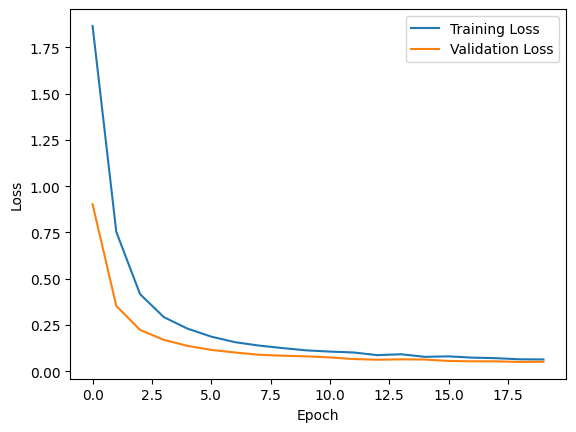

In [6]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

10. Evaluate the Model: After training, evaluate the model’s performance on the testing
dataset. Record the train/test accuracy, confusion matrix, precision and recall.

438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9840 - loss: 0.0533
Test accuracy: 0.982285737991333
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


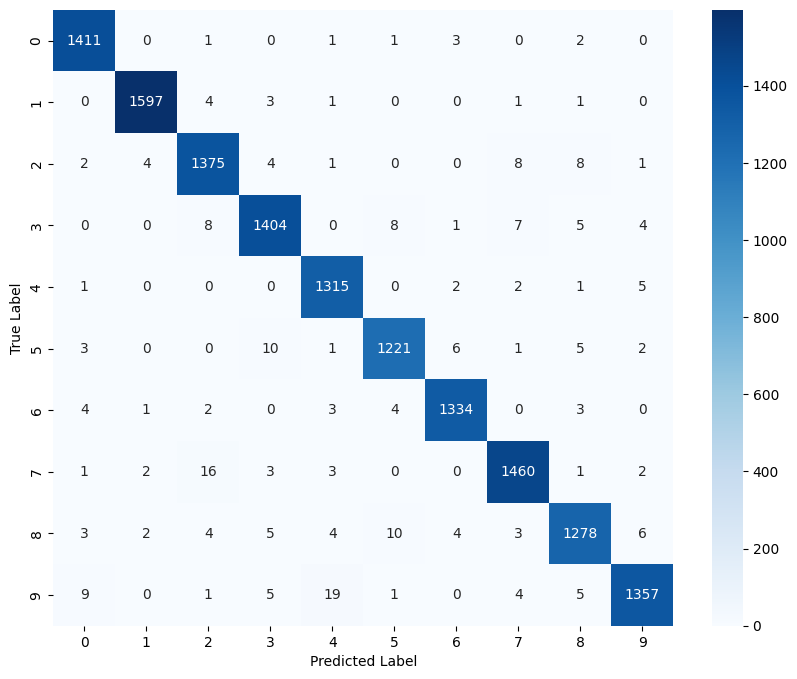

In [7]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Predict the classes for test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [9]:
# Classification report for precision and recall
report = classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1419
           1       0.99      0.99      0.99      1607
           2       0.97      0.98      0.98      1403
           3       0.98      0.98      0.98      1437
           4       0.98      0.99      0.98      1326
           5       0.98      0.98      0.98      1249
           6       0.99      0.99      0.99      1351
           7       0.98      0.98      0.98      1488
           8       0.98      0.97      0.97      1319
           9       0.99      0.97      0.98      1401

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



11. Plot training and validation loss for with respect to epoch for different learning rates
such as 0.0001, 0.001, 0.01, and 0.1. Comment on your results and select a learning
rate with a justification.